In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_functions import *
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [33]:
# Load the data
df = pd.read_csv('data/real_estate/data.csv')
print(df.head(10))
print(df.describe())
print(df.info())

   brokered_by    status     price  bed  bath  acre_lot     street           city        state  zip_code  house_size prev_sold_date
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0       Adjuntas  Puerto Rico     601.0       920.0            NaN
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0       Adjuntas  Puerto Rico     601.0      1527.0            NaN
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0     Juana Diaz  Puerto Rico     795.0       748.0            NaN
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0          Ponce  Puerto Rico     731.0      1800.0            NaN
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0       Mayaguez  Puerto Rico     680.0         NaN            NaN
5     103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0  San Sebastian  Puerto Rico     612.0      2520.0            NaN
6       1205.0  for_sale   50000.0  3.0   1.0      0.20  1298094.0         C

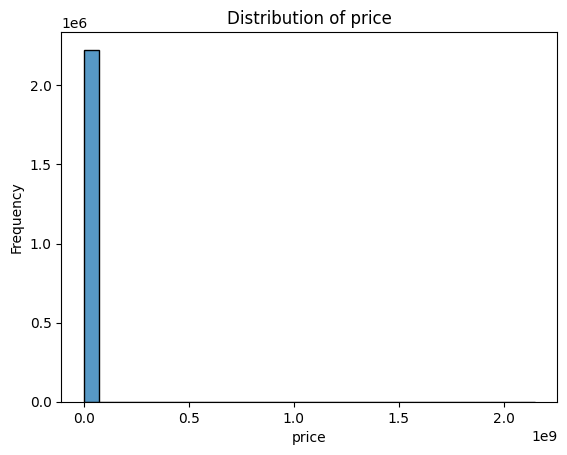

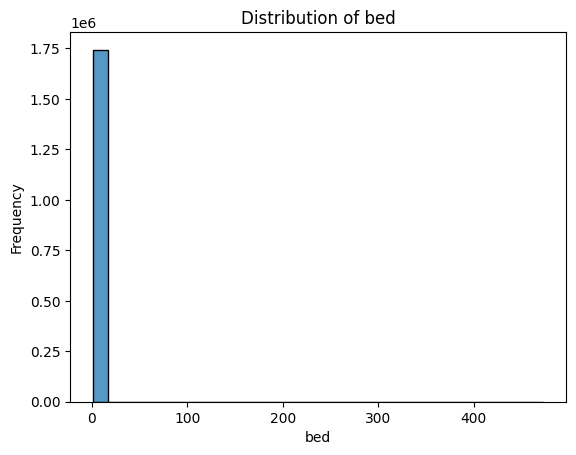

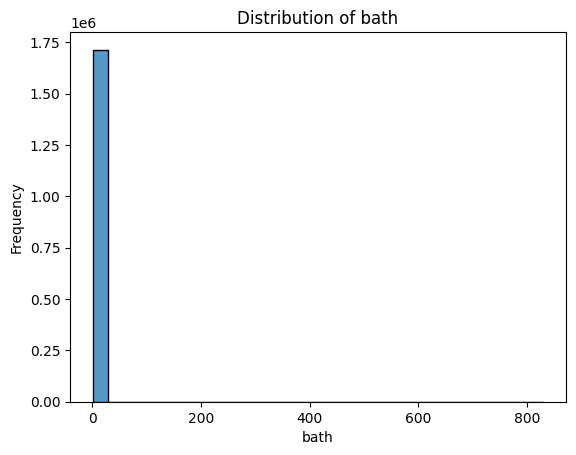

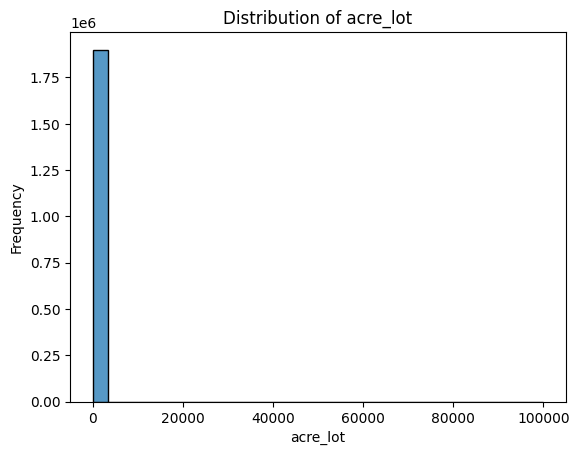

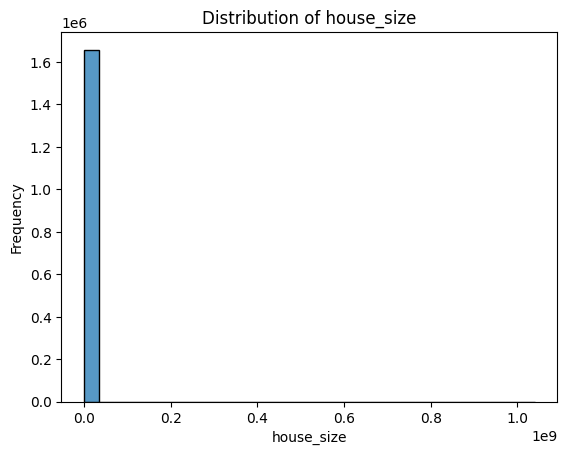

In [34]:
# Plotting the distribution of the data
for col in df[['price', 'bed', 'bath', 'acre_lot', 'house_size']]:
    plt.figure()
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [35]:
# Remove outliers
df = df[(df['bed'] > 0) & (df['bed'] <= 15)]
df = df[(df['bath'] > 0) & (df['bath'] <= 10)]

# Drop rows that exceed 1st or 99th quantile
columns_outliers = ['price', 'acre_lot', 'house_size']
for col in columns_outliers:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.describe()


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.284964e+06,1.287099e+06,1.287099e+06,1.287099e+06,1.287099e+06,1.283496e+06,1.287032e+06,1.287099e+06
mean,5.359723e+04,4.918820e+05,3.361597e+00,2.483923e+00,8.111366e-01,9.310392e+05,5.533871e+04,2.015523e+03
std,3.042413e+04,4.309457e+05,9.962215e-01,9.973316e-01,2.359445e+00,5.331404e+05,2.942711e+04,8.857737e+02
min,0.000000e+00,4.500000e+04,1.000000e+00,1.000000e+00,2.000000e-02,6.300000e+01,6.010000e+02,7.000000e+02
25%,2.504200e+04,2.399000e+05,3.000000e+00,2.000000e+00,1.400000e-01,4.677098e+05,3.025800e+04,1.378000e+03
50%,5.301400e+04,3.750000e+05,3.000000e+00,2.000000e+00,2.100000e-01,9.330825e+05,5.540900e+04,1.811000e+03
75%,7.922100e+04,5.900000e+05,4.000000e+00,3.000000e+00,4.300000e-01,1.391810e+06,8.335000e+04,2.438000e+03
max,1.101420e+05,3.800000e+06,1.500000e+01,1.000000e+01,3.000000e+01,2.001321e+06,9.999900e+04,5.813000e+03


In [36]:
# Drop rows with current prices to keep only transaction prices
df = df[df.status != 'for_sale']
df.drop(columns='status', inplace=True)

# Convert date to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], format='%Y-%m-%d')
df.sort_values(ascending=True, by='prev_sold_date', inplace=True)
df['year'] = df['prev_sold_date'].dt.year
df['month'] = df['prev_sold_date'].dt.month
df.drop(columns='prev_sold_date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,year,month
0,109914.0,140000.0,2.0,1.0,0.08,913812.0,Pawtucket,Rhode Island,2860.0,884.0,2021,10
1,106479.0,499000.0,3.0,2.0,0.48,765575.0,East Sandwich,Massachusetts,2537.0,1736.0,2021,10
2,54638.0,789000.0,4.0,3.0,1.39,1311752.0,East Sandwich,Massachusetts,2537.0,2688.0,2021,10
3,107925.0,549900.0,3.0,3.0,0.38,597597.0,Canton,Massachusetts,2021.0,1632.0,2021,10
4,83692.0,729900.0,4.0,2.0,0.82,1032313.0,East Sandwich,Massachusetts,2537.0,2040.0,2021,10


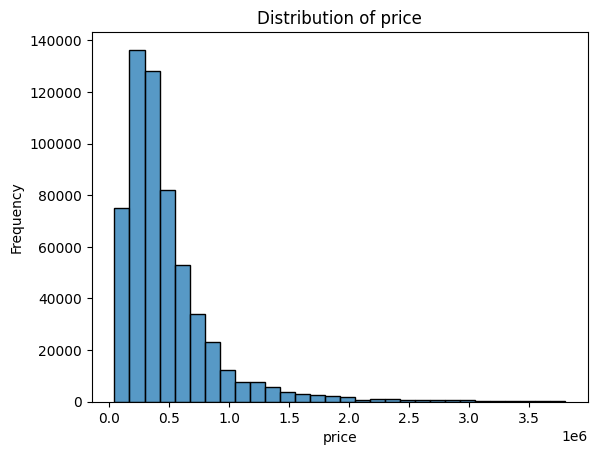

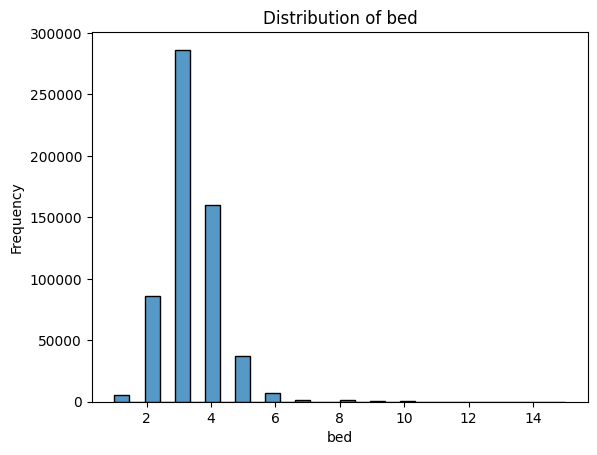

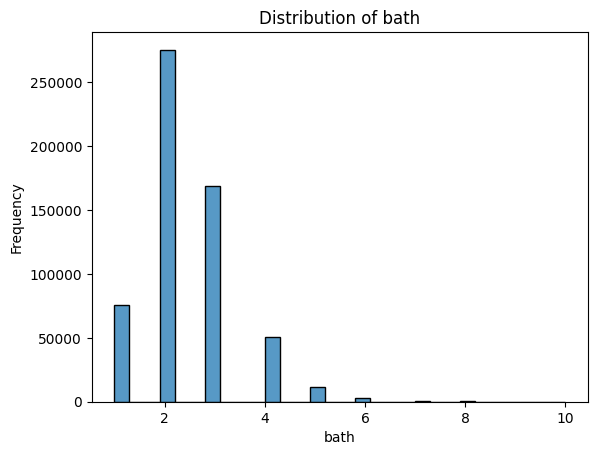

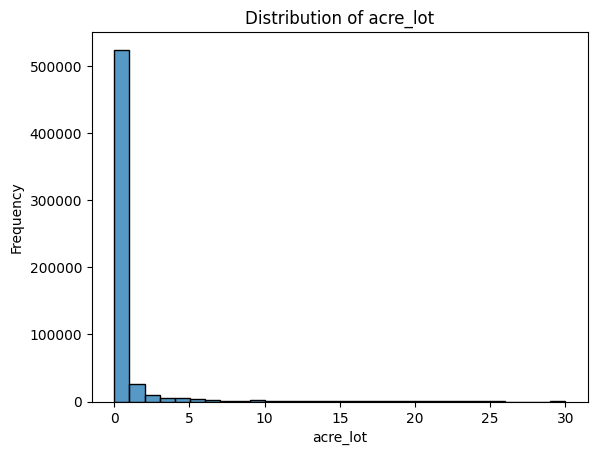

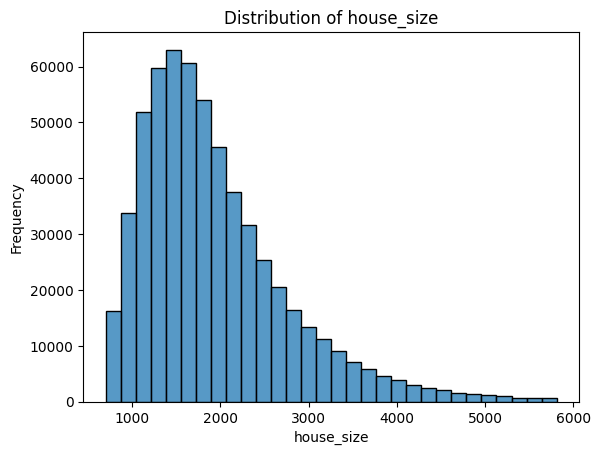

In [37]:
# Plotting the distribution of the adjusted data
for col in df[['price', 'bed', 'bath', 'acre_lot', 'house_size']]:
    plt.figure()
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

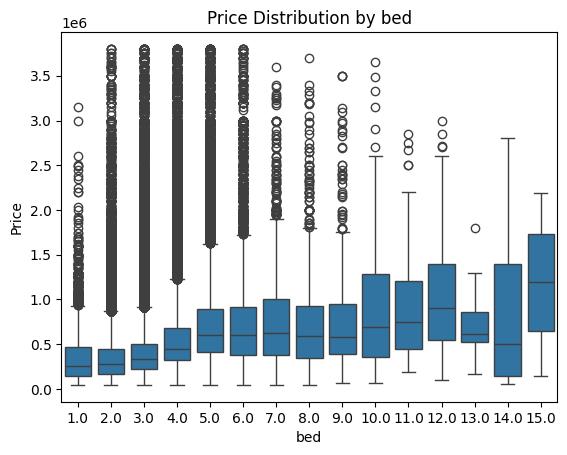

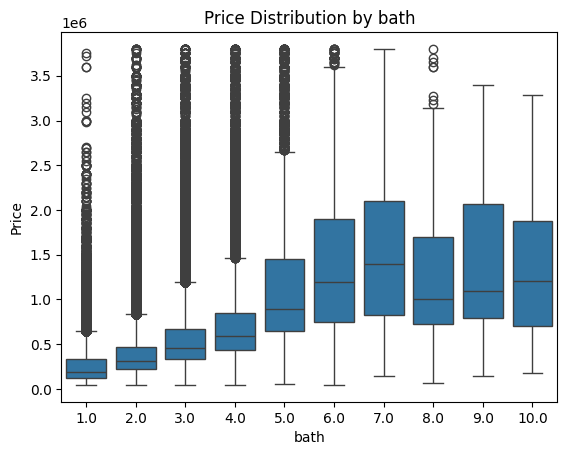

In [38]:
# Plotting price distribution by number of beds and bathrooms
for col in df[['bed', 'bath']]:
    plt.figure()
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [39]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,year,month
count,584299.000000,5.857910e+05,585791.000000,585791.000000,585791.000000,5.845970e+05,585785.000000,585791.000000,585791.000000,585791.000000
mean,53458.365102,4.824059e+05,3.299721,2.418926,0.660046,9.280806e+05,57381.193718,1931.522350,2021.686354,5.529460
std,30434.767932,4.105372e+05,0.945159,0.939523,1.978532,5.298962e+05,30806.292113,828.158723,0.463975,4.120532
min,0.000000,4.500000e+04,1.000000,1.000000,0.020000,1.870000e+02,602.000000,700.000000,2021.000000,1.000000
25%,23972.000000,2.399000e+05,3.000000,2.000000,0.140000,4.665590e+05,30052.000000,1340.000000,2021.000000,3.000000
50%,53016.000000,3.740000e+05,3.000000,2.000000,0.200000,9.291380e+05,60564.000000,1745.000000,2022.000000,4.000000
75%,79202.000000,5.800000e+05,4.000000,3.000000,0.360000,1.389209e+06,86442.000000,2319.000000,2022.000000,11.000000
max,110138.000000,3.800000e+06,15.000000,10.000000,30.000000,2.000878e+06,99403.000000,5812.000000,2022.000000,12.000000


In [40]:
# Check for missing values
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

# Drop all rows with missing values (less than 1% of the data)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

brokered_by    0.254698
street         0.203827
city           0.005121
zip_code       0.001024
dtype: float64


In [41]:
# Load House Price Index data
df_hpi = pd.read_csv('data/macro/USSTHPI.csv')
df_hpi = macro_date(df_hpi)
df_hpi = quarterly_to_monthly(df_hpi)

In [42]:
print(df_hpi.tail())

     USSTHPI  year  month
593   681.11  2024      6
594   687.80  2024      7
595   687.80  2024      8
596   687.80  2024      9
597   690.90  2024     10


In [43]:
# Create synthetic data for 1975-2023
years_to_generate = list(range(1975, 2024))

# Shuffle data and divide into chunks
df = df.sample(frac=1).reset_index(drop=True)
chunks = np.array_split(df, len(years_to_generate))

synthetic_data = []

for idx, target_year in enumerate(years_to_generate):
    year_chunk = chunks[idx].copy()
    original_years = year_chunk['year'].copy()
    
    # Adjust prices using HPI ratio
    for i, row in year_chunk.iterrows():
        month = row['month']
        original_year = original_years[i]
        
        # Get HPI values
        hpi_target = df_hpi.loc[
            (df_hpi['year'] == target_year) & 
            (df_hpi['month'] == month), 'USSTHPI'].values[0]
        
        hpi_original = df_hpi.loc[
            (df_hpi['year'] == original_year) & 
            (df_hpi['month'] == month), 'USSTHPI'].values[0]
        
        year_chunk.at[i, 'price'] = row['price'] * (hpi_target / hpi_original)
    
    # Update year after adjustment
    year_chunk['year'] = target_year
    synthetic_data.append(year_chunk)

synthetic_df = pd.concat(synthetic_data, ignore_index=True)
print(synthetic_df.head())

/home/essa/ing_housing/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


   brokered_by         price  bed  bath  acre_lot     street           city       state  zip_code  house_size  year  month
0      81779.0  12831.723247  4.0   2.0      0.13   340258.0    Bloomington    Illinois   61701.0      2064.0  1975     11
1      38377.0   7203.186679  2.0   1.0      0.69   862724.0         Guyton     Georgia   31312.0      1100.0  1975     12
2      78644.0  48810.305610  3.0   2.0      0.16  1240055.0       Stockton  California   95219.0      1809.0  1975      4
3      58031.0  23452.235699  2.0   3.0      0.17   885779.0      Lexington    Kentucky   40503.0      1426.0  1975     12
4       4699.0  76344.532125  3.0   2.0      0.20   103843.0  Mission Hills  California   91345.0      1222.0  1975      2


In [44]:
print(synthetic_df.describe())

         brokered_by         price            bed           bath       acre_lot        street       zip_code     house_size           year          month
count  583070.000000  5.830700e+05  583070.000000  583070.000000  583070.000000  5.830700e+05  583070.000000  583070.000000  583070.000000  583070.000000
mean    53458.644854  2.115241e+05       3.299966       2.419149       0.660013  9.281770e+05   57407.811863    1931.964836    1998.999511       5.529844
std     30434.483837  2.345222e+05       0.945165       0.939666       1.978566  5.298982e+05   30818.296390     828.455686      14.142211       4.120420
min         0.000000  4.456206e+03       1.000000       1.000000       0.020000  1.870000e+02     602.000000     700.000000    1975.000000       1.000000
25%     23965.250000  7.530243e+04       3.000000       2.000000       0.140000  4.666665e+05   30044.000000    1340.000000    1987.000000       3.000000
50%     53016.000000  1.420887e+05       3.000000       2.000000       0.200

In [ ]:
# Load and process unemployment data
df_unemployment = pd.read_csv('data/macro/UNRATENSA.csv')
df_unemployment = macro_date(df_unemployment)
df_unemployment = yearly_change(df_unemployment, 'UNRATENSA', 'unemployment')

In [46]:
# Load and process CPI data
df_cpi = pd.read_csv('data/macro/CPIAUCNS.csv')
df_cpi = macro_date(df_cpi)
df_cpi = yearly_change(df_cpi, 'CPIAUCNS', 'cpi')

In [47]:
# Load and process Real GDP data
df_real_gdp = pd.read_csv('data/macro/REALGDP.csv')
df_real_gdp = macro_date(df_real_gdp)
df_real_gdp = quarterly_to_monthly(df_real_gdp)
df_real_gdp.rename(columns={'A191RO1Q156NBEA': 'real_gdp_yr_change'}, inplace=True)

In [48]:
# Merge the dataframes
synthetic_df = synthetic_df.merge(df_unemployment, how='left', on=['year', 'month'])
synthetic_df = synthetic_df.merge(df_cpi, how='left', on=['year', 'month'])
synthetic_df = synthetic_df.merge(df_real_gdp, how='left', on=['year', 'month'])
synthetic_df.head()

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,year,month,unemployment_yr_change,cpi_yr_change,real_gdp_yr_change
0,81779.0,12831.723247,4.0,2.0,0.13,340258.0,Bloomington,Illinois,61701.0,2064.0,1975,11,1.6,3.8,2.6
1,38377.0,7203.186679,2.0,1.0,0.69,862724.0,Guyton,Georgia,31312.0,1100.0,1975,12,1.1,3.6,2.6
2,78644.0,48810.305610,3.0,2.0,0.16,1240055.0,Stockton,California,95219.0,1809.0,1975,4,3.8,4.9,-1.8
3,58031.0,23452.235699,2.0,3.0,0.17,885779.0,Lexington,Kentucky,40503.0,1426.0,1975,12,1.1,3.6,2.6
4,4699.0,76344.532125,3.0,2.0,0.20,103843.0,Mission Hills,California,91345.0,1222.0,1975,2,3.3,5.3,-2.3


In [49]:
synthetic_df[['brokered_by', 'street', 'zip_code', 'city', 'state']].nunique()

brokered_by     52004
street         580309
zip_code        17456
city            11143
state              51
dtype: int64

In [50]:
# Drop street column because majority of the data was obfuscated due to privacy reasons (with almost no overlap for different houses)
synthetic_df.drop(columns=['street'], inplace=True)

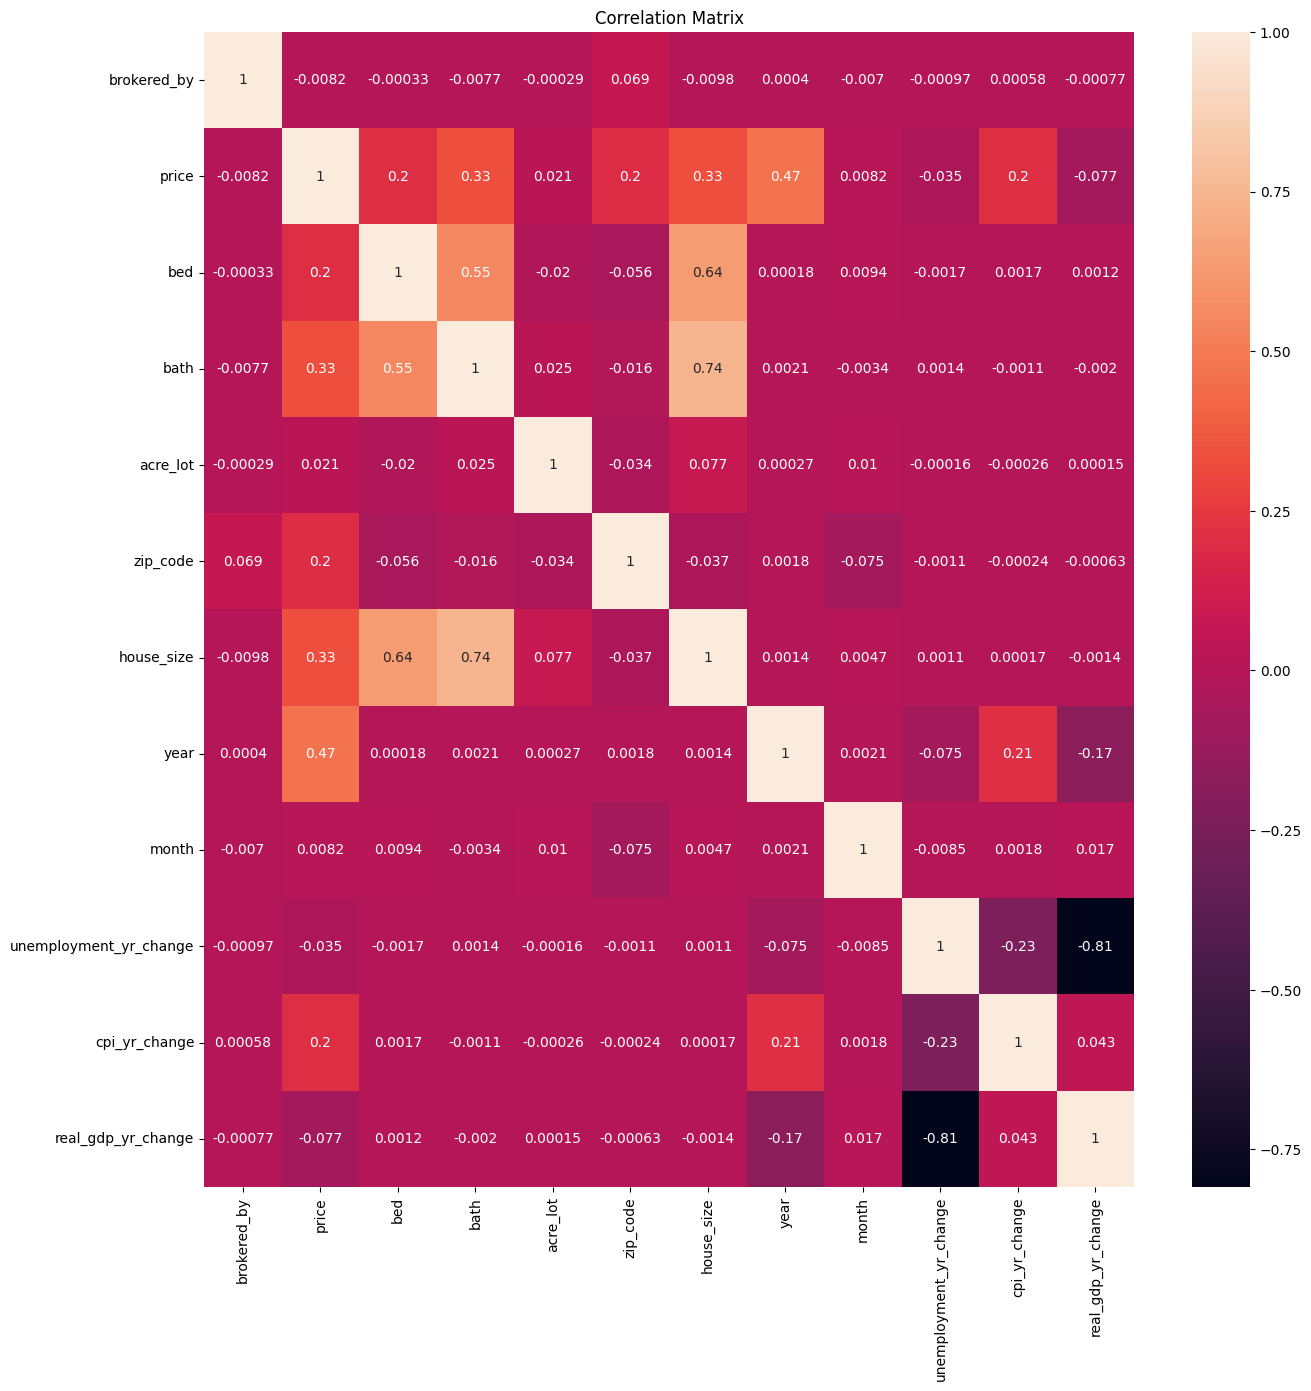

In [51]:
# Visualize correlations
plt.figure(figsize=(15, 15))
sns.heatmap(synthetic_df.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [52]:
# Save the data
synthetic_df.to_csv('data/real_estate/synthetic_data.csv', index=False)
print('Data saved to synthetic_data.csv')

Data saved to synthetic_data.csv
